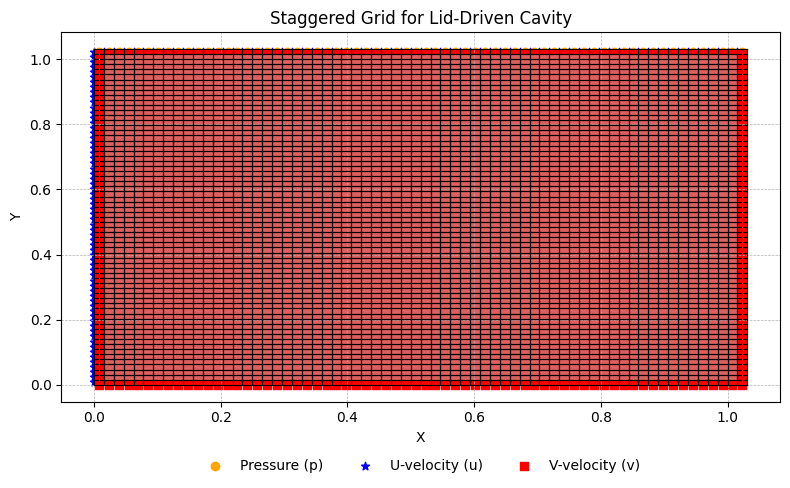

Streaming output truncated to the last 5000 lines.

Iteration 2924: max_diff_p = 8.69026363152336e-06, max_diff_u = 1.475717681387323e-08, max_diff_v = 1.3900386175436097e-08


Solving SIMPLE Iteration 2925...

U_Iteration 1: u_error = 1.789294064025171e-07

V_Iteration 1: v_error = 1.114475136620996e-07

p_error = 8.57310081975794e-06

Iteration 2925: max_diff_p = 8.57310081975794e-06, max_diff_u = 1.5027836752778967e-08, max_diff_v = 1.4143124893450931e-08


Solving SIMPLE Iteration 2926...

U_Iteration 1: u_error = 1.8151213909689545e-07

V_Iteration 1: v_error = 1.105293503389504e-07

p_error = 8.42836288672776e-06

Iteration 2926: max_diff_p = 8.42836288672776e-06, max_diff_u = 1.5246955697989506e-08, max_diff_v = 1.4337441900380554e-08


Solving SIMPLE Iteration 2927...

U_Iteration 1: u_error = 1.836840661795236e-07

V_Iteration 1: v_error = 1.0952307150091656e-07

p_error = 8.25677161214522e-06

Iteration 2927: max_diff_p = 8.25677161214522e-06, max_diff_u = 1.541422633977163e-

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

############# LID-DRIVEN CAVITY #############

### Variable Declaration ###
total_H     = 1.0                      # Height of Left and Right Wall (in m)
L           = 1.0                      # Length of Top and Bottom Wall (in m)
U_lid       = 10                       # Velocity at the top wall (in m/s)

rho         = 1.0                      # Density (in kg/m3)
Re_num      = 50                       # Reynolds Number (DON'T SET IT ABOVE '1200'!!)
viscosity   = (U_lid * L)/Re_num       # Kinematic Viscosity (m^2/s)

alphaP      = 0.50                     # Pressure Relaxation (0.3 - 0.6)
alphaU      = 0.80                     # U-Velocity Relaxation (0.5 - 0.9)
alphaV      = 0.80                     # V-Velocity Relaxation (0.5 - 0.9)

u_tol       = 1e-6                     # Convergence criteria for U-velocity
v_tol       = 1e-6                     # Convergence criteria for V-velocity
p_tol       = 1e-6                     # Convergence criteria for pressure

p_diffs     = []
u_diffs     = []
v_diffs     = []


### Initializing Grid Matrix ###
Nx  = 64
dx  = L/Nx
x_p = np.linspace(dx/2, L + 3*dx/2, Nx+2)     # Generate x-coordinates for pressure points ('Nx + 2' points)
x_u = np.linspace(   0, L + dx,     Nx+2)     # Generate x-coordinates for u-velocity points ('Nx + 2' points)
x_v = np.linspace(dx/2, L + 3*dx/2, Nx+2)     # Generate x-coordinates for v-velocity points ('Nx + 2' points)

Ny  = 64
dy  = total_H/Ny
y_p = np.linspace(dy/2, total_H + 3*dy/2, Ny+2)     # Generate y-coordinates for pressure points ('Ny + 2' points)
y_u = np.linspace(dy/2, total_H + 3*dy/2, Ny+2)     # Generate y-coordinates for u-velocity points ('Ny + 2' points)
y_v = np.linspace(   0, total_H + dy,     Ny+2)     # Generate y-coordinates for v-velocity points ('Ny + 2' points)

X_p, Y_p = np.meshgrid(x_p, y_p)
X_u, Y_u = np.meshgrid(x_u, y_u)
X_v, Y_v = np.meshgrid(x_v, y_v)


### Drawing the Staggered Grid ###
plt.figure(figsize=(8, 5))
plt.scatter(X_p, Y_p, color='orange', marker='o', label='Pressure (p)')
plt.scatter(X_u, Y_u, color='blue', marker='*', label='U-velocity (u)')
plt.scatter(X_v, Y_v, color='red', marker='s', label='V-velocity (v)')

# Custom dark gray with transparency
fill_color = (0.75, 0.75, 0.75, 0.50)  # (R, G, B, alpha)

# Draw filled boxes and borders
for i in range(Nx+2):
    for j in range(Ny+2):
        x_box = [x_p[i] - dx/2, x_p[i] + dx/2, x_p[i] + dx/2, x_p[i] - dx/2]
        y_box = [y_p[j] - dy/2, y_p[j] - dy/2, y_p[j] + dy/2, y_p[j] + dy/2]

        # Fill interior cells
        if 0 < i < Nx+1 and 0 < j < Ny+1:
            plt.fill(x_box, y_box, color=fill_color, edgecolor='none', zorder=1)

        # Determine border style based on cell type
        is_ghost = (i == 0 or i == Nx+1 or j == 0 or j == Ny+1)

        # Draw each side separately with appropriate style
        sides = [
            ([x_box[0], x_box[1]], [y_box[0], y_box[1]]),  # bottom
            ([x_box[1], x_box[2]], [y_box[1], y_box[2]]),  # right
            ([x_box[2], x_box[3]], [y_box[2], y_box[3]]),  # top
            ([x_box[3], x_box[0]], [y_box[3], y_box[0]])   # left
        ]

        # Inner Box Dash
        for k, (x_side, y_side) in enumerate(sides):
            # Check if this side borders an interior cell
            borders_interior = False
            if is_ghost:
                if (i == 0 and k == 3) or (i == Nx+1 and k == 1):  # left/right borders
                    borders_interior = True
                if (j == 0 and k == 0) or (j == Ny+1 and k == 2):  # bottom/top borders
                    borders_interior = True

            # Draw with appropriate style
            if is_ghost and not borders_interior:
                plt.plot(x_side, y_side, 'k--', linewidth=0.8, dashes=(3, 2), zorder=2)
            else:
                plt.plot(x_side, y_side, 'k-', linewidth=0.8, zorder=2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Staggered Grid for Lid-Driven Cavity")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3, frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Creating u, v, p matrices with all zeros ###
u_vel     = np.zeros((Nx+2, Ny+2))
uStar     = np.zeros((Nx+2, Ny+2))
uStar_new = np.zeros((Nx+2, Ny+2))

v_vel     = np.zeros((Nx+2, Ny+2))
vStar     = np.zeros((Nx+2, Ny+2))
vStar_new = np.zeros((Nx+2, Ny+2))

p         = np.zeros((Nx+2, Ny+2))
pStar     = np.zeros((Nx+2, Ny+2))
pPrime    = np.zeros((Nx+2, Ny+2))


### Apply Boundary Conditions ###
def apply_u_boundary_conditions(u_vel):
    # Bottom Wall (y = 0) - No-slip
    u_vel[1:, 0]     = - u_vel[1:, 1]                # Enforcing interpolated condition for u

    # Top Wall (y = H)    - Moving lid
    u_vel[1:, -1]    =   2 * U_lid - u_vel[1:, -2]   # Enforcing interpolated condition for u

    # Left Wall (x = 0)   - No-slip
    u_vel[1, 1:-1]   =   0.0                         # No-slip for u

    # Right Wall (x = L)  - No-slip
    u_vel[-1, 1:-1]  =   0.0                         # No-slip for u

def apply_v_boundary_conditions(v_vel):
    # Bottom Wall (y = 0) - No-slip
    v_vel[1:-1, 1]   =   0.0                         # No-slip for v

    # Top Wall (y = H)    - Moving lid
    v_vel[1:-1, -1]  =   0.0                         # No-slip for v

    # Left Wall (x = 0)   - No-slip
    v_vel[0, 1:]     = - v_vel[1, 1:]                # Enforcing interpolated condition for v

    # Right Wall (x = L)  - No-slip
    v_vel[-1, 1:]    = - v_vel[-2, 1:]               # Enforcing interpolated condition for v

def apply_p_boundary_conditions(p):
    # Pressure Neumann Condition (dp/dn = 0)
    p[1:-1, 0]     =  p[1:-1, 1]      # Bottom boundary
    p[1:-1, -1]    =  p[1:-1, -2]     # Top boundary
    p[0, 1:-1]     =  p[1, 1:-1]      # Left boundary
    p[-1, 1:-1]    =  p[-2, 1:-1]     # Right boundary

apply_u_boundary_conditions(u_vel)
apply_v_boundary_conditions(v_vel)
apply_p_boundary_conditions(p)


### Copy for Predictor-Corrector Steps ###
uStar       = u_vel.copy()
uStar_new   = u_vel.copy()
vStar       = v_vel.copy()
vStar_new   = v_vel.copy()
pStar       = p.copy()


### Creating coefficients of the Algebraic Equation with zeros ###
# Coefficients for U-momentum
auP = np.zeros((Nx+2, Ny+2))
auE = np.zeros((Nx+2, Ny+2))
auW = np.zeros((Nx+2, Ny+2))
auN = np.zeros((Nx+2, Ny+2))
auS = np.zeros((Nx+2, Ny+2))
bU  = np.zeros((Nx+2, Ny+2))

# Coefficients for V-momentum
avP = np.zeros((Nx+2, Ny+2))
avE = np.zeros((Nx+2, Ny+2))
avW = np.zeros((Nx+2, Ny+2))
avN = np.zeros((Nx+2, Ny+2))
avS = np.zeros((Nx+2, Ny+2))
bV  = np.zeros((Nx+2, Ny+2))

# Coefficients for Pressure Correction
apP = np.zeros((Nx+2, Ny+2))
apE = np.zeros((Nx+2, Ny+2))
apW = np.zeros((Nx+2, Ny+2))
apN = np.zeros((Nx+2, Ny+2))
apS = np.zeros((Nx+2, Ny+2))
bP  = np.zeros((Nx+2, Ny+2))


### Function to solve the tridiagonal matrix system using TDMA ###
def tdma(num, dia, upp, low, rhs, mat):
    """ Solves a tridiagonal matrix system using Thomas Algorithm. """
    P = np.zeros(num)
    Q = np.zeros(num)

    # Forward elimination
    P[0] = -upp[0] / dia[0]
    Q[0] = rhs[0] / dia[0]
    for i in range(1, num):
        denom = dia[i] + low[i] * P[i-1]
        P[i] = -upp[i] / denom
        Q[i] = (rhs[i] - low[i] * Q[i-1]) / denom

    # Backward substitution
    mat[-1] = Q[-1]
    for i in range(num-2, -1, -1):
        mat[i] = P[i] * mat[i+1] + Q[i]

    return mat


### Capture frames after every 'n' iterations ###
U_interp = np.zeros_like(u_vel)
V_interp = np.zeros_like(v_vel)
pressure_frames = []
velocity_frames = []

def capture_frame():
    """Store current pressure and velocity fields for animation."""
    # Calculate velocity magnitude
    U_interp[1:-1, 1:-1] = (u_vel[1:-1, 1:-1] + u_vel[2:, 1:-1]) / 2
    V_interp[1:-1, 1:-1] = (v_vel[1:-1, 1:-1] + v_vel[1:-1, 2:]) / 2
    Velocity_Magnitude = np.sqrt(U_interp**2 + V_interp**2)

    # Store every 10th iteration (adjust as needed)
    if iter % 10 == 0:
        pressure_frames.append(p.copy())
        velocity_frames.append(Velocity_Magnitude.copy())


### 'SIMPLE' ALGORITHM ###
conv = float('inf')
iter = 1
while iter <= 5000 and conv > 1e-6:
    print(f"Solving SIMPLE Iteration {iter}...\n")
    # STEP 1: Solve X-Momentum as uStar
    # Set up Coefficients using Hybrid Scheme
    u_error = float('inf')
    u_iter = 1
    while u_error > u_tol and u_iter <= 1:
        for i in range(1, Nx+2):
            for j in range(1, Ny+1):
                if i == 1 or i == Nx+1:
                    auP[i,j] =  1.0
                else:
                    Fe = (uStar[i+1,j] + uStar[i,j])     / 2
                    Fw = (uStar[i,j]   + uStar[i-1,j])   / 2
                    Fn = (vStar[i,j+1] + vStar[i-1,j+1]) / 2
                    Fs = (vStar[i,j]   + vStar[i-1,j])   / 2

                    Pe_e = Fe / (viscosity / dx)
                    Pe_w = Fw / (viscosity / dx)
                    Pe_n = Fn / (viscosity / dy)
                    Pe_s = Fs / (viscosity / dy)

                    # East Face (auE)
                    if -2 <= Pe_e <= 2:
                        auE[i,j]    = - dy/2 * Fe      + viscosity * dy/dx
                        aue_contrib =   dy/2 * Fe
                    else:
                        auE[i,j]    = - dy * min(Fe,0) + viscosity * dy/dx
                        aue_contrib =   dy * max(Fe,0)

                    # West Face (auW)
                    if -2 <= Pe_w <= 2:
                        auW[i,j]    =   dy/2 * Fw      + viscosity * dy/dx
                        auw_contrib = - dy/2 * Fw
                    else:
                        auW[i,j]    =   dy * max(Fw,0) + viscosity * dy/dx
                        auw_contrib = - dy * min(Fw,0)

                    # North Face (auN)
                    if -2 <= Pe_n <= 2:
                        auN[i,j]    = - dx/2 * Fn      + viscosity * dx/dy
                        aun_contrib =   dx/2 * Fn
                    else:
                        auN[i,j]    = - dx * min(Fn,0) + viscosity * dx/dy
                        aun_contrib =   dx * max(Fn,0)

                    # South Face (auS)
                    if -2 <= Pe_s <= 2:
                        auS[i,j]    =   dx/2 * Fs      + viscosity * dx/dy
                        aus_contrib = - dx/2 * Fs
                    else:
                        auS[i,j]    =   dx * max(Fs,0) + viscosity * dx/dy
                        aus_contrib = - dx * min(Fs,0)

                    auP[i,j] = (aue_contrib + auw_contrib + aun_contrib + aus_contrib + 2 * viscosity * (dy/dx + dx/dy)) / alphaU

                    bU[i,j]  =  dy/rho * (pStar[i-1,j] - pStar[i,j])   + (1 - alphaU) * auP[i,j] * uStar[i,j]

        # Solve for uStar_new using Line-by-Line TDMA (Y-direction first)
        for i in range(2, Nx+1):     # Loop over x-columns (excluding boundaries)
            d    = np.zeros(Ny)      # Main diagonal
            u    = np.zeros(Ny)      # Upper diagonal
            l    = np.zeros(Ny)      # Lower diagonal
            rhs  = np.zeros(Ny)      # Right-hand side

            # Construct system of equations for column i for interior points
            for j in range(Ny):   # j = 0 to Ny-1 (maps to physical indices j+1)
                jj = j + 1        # Map Python index to domain index (1 → Ny)

                d[j]   = auP[i, jj]
                rhs[j] = bU[i, jj] + auE[i, jj] * uStar_new[i+1, jj] + auW[i, jj] * uStar_new[i-1, jj]

                if j == 0:                # First interior u-point (j = 1 in domain)
                    u[j]    = -auN[i, jj]
                    rhs[j] +=  auS[i, jj] * uStar[i, jj-1]
                elif j == Ny - 1:         # Last interior u-point (j = Ny in domain)
                    l[j]    = -auS[i, jj]
                    rhs[j] +=  auN[i, jj] * uStar[i, jj+1]
                else:                     # General case for interior points
                    l[j]    = -auS[i, jj]
                    u[j]    = -auN[i, jj]

            # Solve for uStar_new in this column using TDMA
            uStar_new[i, 1:Ny+1] = tdma(Ny, d, u, l, rhs, uStar_new[i, 1:Ny+1])

        # Apply U-velocity boundary conditions
        apply_u_boundary_conditions(uStar_new)

        # Calculate the error value
        u_error = np.max(np.abs(uStar_new - uStar))
        print(f"U_Iteration {u_iter}: u_error = {u_error}")

        # Copy 'uStar_new' into 'uStar' for further inner iterations
        uStar[:, :] = uStar_new
        u_iter      = u_iter + 1

    print()


    # STEP 2: Solve Y-Momentum as vStar
    # Set up Coefficients using Hybrid Scheme
    v_error = float('inf')
    v_iter  = 1
    while v_error > v_tol and v_iter <= 1:
        for i in range(1, Nx+1):
            for j in range(1, Ny+2):
                if j == 1 or j == Ny+1:
                    avP[i,j] =  1.0
                else:
                    Fe = (uStar[i+1,j] + uStar[i+1,j-1]) / 2
                    Fw = (uStar[i,j]   + uStar[i,j-1])   / 2
                    Fn = (vStar[i,j+1] + vStar[i,j])     / 2
                    Fs = (vStar[i,j]   + vStar[i,j-1])   / 2

                    Pe_e = Fe / (viscosity / dx)
                    Pe_w = Fw / (viscosity / dx)
                    Pe_n = Fn / (viscosity / dy)
                    Pe_s = Fs / (viscosity / dy)

                    # East Face (avE)
                    if -2 <= Pe_e <= 2:
                        avE[i,j]    = - dy/2 * Fe      + viscosity * dy/dx
                        ave_contrib =   dy/2 * Fe
                    else:
                        avE[i,j]    = - dy * min(Fe,0) + viscosity * dy/dx
                        ave_contrib =   dy * max(Fe,0)

                    # West Face (avW)
                    if -2 <= Pe_w <= 2:
                        avW[i,j]    =   dy/2 * Fw      + viscosity * dy/dx
                        avw_contrib = - dy/2 * Fw
                    else:
                        avW[i,j]    =   dy * max(Fw,0) + viscosity * dy/dx
                        avw_contrib = - dy * min(Fw,0)

                    # North Face (avN)
                    if -2 <= Pe_n <= 2:
                        avN[i,j]    = - dx/2 * Fn      + viscosity * dx/dy
                        avn_contrib =   dx/2 * Fn
                    else:
                        avN[i,j]    = - dx * min(Fn,0) + viscosity * dx/dy
                        avn_contrib =   dx * max(Fn,0)

                    # South Face (avS)
                    if -2 <= Pe_s <= 2:
                        avS[i,j]    =   dx/2 * Fs      + viscosity * dx/dy
                        avs_contrib = - dx/2 * Fs
                    else:
                        avS[i,j]    =   dx * max(Fs,0) + viscosity * dx/dy
                        avs_contrib = - dx * min(Fs,0)

                    avP[i,j] =  (ave_contrib + avw_contrib + avn_contrib + avs_contrib + 2 * viscosity * (dy/dx + dx/dy)) / alphaV

                    bV[i,j]  =  dx/rho * (pStar[i,j-1] - pStar[i,j])   + (1 - alphaV) * avP[i,j] * vStar[i,j]

        # Solve for vStar_new using Line-by-Line TDMA (Y-direction first)
        for i in range(1, Nx+1):       # Loop over x-columns (excluding boundaries)
            d    = np.zeros(Ny-1)      # Main diagonal
            u    = np.zeros(Ny-1)      # Upper diagonal
            l    = np.zeros(Ny-1)      # Lower diagonal
            rhs  = np.zeros(Ny-1)      # Right-hand side

            # Construct system of equations for column i
            for j in range(1, Ny):     # Loop over y-rows (internal points)
                jj = j + 1             # Shift index to match domain indexing (j = 2 to Ny)

                d[j-1]   =  avP[i, jj]
                u[j-1]   = -avN[i, jj]
                l[j-1]   = -avS[i, jj]
                rhs[j-1] =  bV[i, jj] + avE[i, jj] * vStar_new[i+1, jj] + avW[i, jj] * vStar_new[i-1, jj]

            # Solve for vStar_new in this column using TDMA
            vStar_new[i, 2:Ny+1] = tdma(Ny-1, d, u, l, rhs, vStar_new[i, 2:Ny+1])

        # Apply V-velocity boundary conditions
        apply_v_boundary_conditions(vStar_new)

        # Calculate the error value
        v_error = np.max(np.abs(vStar_new - vStar))
        print(f"V_Iteration {v_iter}: v_error = {v_error}")

        # Copy 'vStar_new' into 'vStar' for further inner iterations
        vStar[:, :] = vStar_new
        v_iter      = v_iter + 1

    print()


    # STEP 3: Solve Pressure Correction Equation
    for i in range(1, Nx+1):
        for j in range(1, Ny+1):
            apE[i,j] =  dy**2 * alphaU / (rho * auP[i+1,j])
            apW[i,j] =  dy**2 * alphaU / (rho * auP[i,j])
            apN[i,j] =  dx**2 * alphaV / (rho * avP[i,j+1])
            apS[i,j] =  dx**2 * alphaV / (rho * avP[i,j])

            apP[i,j] =  apE[i,j] + apW[i,j] + apN[i,j] + apS[i,j]
            bP[i,j]  =  (uStar_new[i,j] - uStar_new[i+1,j]) * dy + (vStar_new[i,j] - vStar_new[i,j+1]) * dx

    # Solve for pPrime using Line-by-Line TDMA (Y-direction first)
    for i in range(1, Nx+1):     # Loop over x-columns (including boundaries)
        d    = np.zeros(Ny)      # Main diagonal
        u    = np.zeros(Ny)      # Upper diagonal
        l    = np.zeros(Ny)      # Lower diagonal
        rhs  = np.zeros(Ny)      # Right-hand side

        # Construct system of equations for column i
        for j in range(1, Ny+1):       # Loop over y-rows (internal points)
            jj = j - 1                 # Shift index to match d, u, l indexing (j = 0 to Ny-1)

            d[jj]   =  apP[i, j]
            l[jj]   = -apS[i, j]
            u[jj]   = -apN[i, j]
            rhs[jj] =  bP[i, j]  + apE[i, j] * pPrime[i+1, j] + apW[i, j] * pPrime[i-1, j]

        # Solve for pPrime in this column using TDMA
        pPrime[i, 1:Ny+1] = tdma(Ny, d, u, l, rhs, pPrime[i, 1:Ny+1])

    # Apply p-velocity boundary conditions
    apply_p_boundary_conditions(pPrime)

    # Calculate the error value
    p_error = np.max(np.abs(pPrime))
    print(f"p_error = {p_error}")

    print()


    # STEP 4: Correct Pressure and Velocity Fields
    # Correct Pressure
    for i in range(1, Nx+1):
        for j in range(1, Ny+1):
            p[i, j] = pStar[i, j] + alphaP * pPrime[i, j]

    # Correct U-Velocity
    for i in range(2, Nx+1):
        for j in range(1, Ny+1):
            u_vel[i, j] = uStar_new[i, j] + dy / (rho * auP[i,j]) * (pPrime[i-1, j] - pPrime[i, j])
            u_vel[i, j] = alphaU * u_vel[i, j] + (1 - alphaU) * uStar[i, j]

    # Correct V-Velocity
    for i in range(1, Nx+1):
        for j in range(2, Ny+1):
            v_vel[i, j] = vStar_new[i, j] + dx / (rho * avP[i,j]) * (pPrime[i, j-1] - pPrime[i, j])
            v_vel[i, j] = alphaV * v_vel[i, j] + (1 - alphaV) * vStar[i, j]

    apply_u_boundary_conditions(u_vel)
    apply_v_boundary_conditions(v_vel)
    apply_p_boundary_conditions(p)


    # STEP 5: Check Maximum Absolute Difference for Convergence
    max_diff_p = np.max(np.abs(pPrime))             # Since pPrime is the correction
    max_diff_u = np.max(np.abs(u_vel - uStar))
    max_diff_v = np.max(np.abs(v_vel - vStar))

    print(f"Iteration {iter}: max_diff_p = {max_diff_p}, max_diff_u = {max_diff_u}, max_diff_v = {max_diff_v}\n\n")

    # Store differences for plotting
    p_diffs.append(max_diff_p)
    u_diffs.append(max_diff_u)
    v_diffs.append(max_diff_v)


    # STEP 6: Check Convergence and capture frames
    conv = max(max_diff_p, max_diff_u, max_diff_v)
    if conv < 1e-6:
        print(f'Converged at iteration {iter}.')
        break
    capture_frame()
    iter = iter + 1

    # STEP 7: Update Variables for the Next Iteration
    pStar     = np.copy(p)          # Update Pressure
    pPrime    = np.zeros_like(p)
    uStar     = np.copy(u_vel)      # Update U-Velocity
    uStar_new = np.copy(u_vel)
    vStar     = np.copy(v_vel)      # Update V-Velocity
    vStar_new = np.copy(v_vel)


print()
print(f'pPrime = {pPrime}\n')
print(f'pStar = {pStar}\n')
print(f'p = {p}\n')
print(f'uStar = {uStar}\n')
print(f'u_vel = {u_vel}\n')
print(f'vStar = {vStar}\n')
print(f'v_vel = {v_vel}\n')
print()


In [ ]:
# ---------- CONTOUR ANIMATION ----------

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Precompute global min/max for both pressure and velocity
pressure_array = np.array(pressure_frames)
velocity_array = np.array(velocity_frames)
p_min, p_max = np.min(pressure_array[:, 1:-1, 1:-1]), np.max(pressure_array[:, 1:-1, 1:-1])
v_min, v_max = np.min(velocity_array[:, 1:-1, 1:-1]), np.max(velocity_array[:, 1:-1, 1:-1])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Add the super title with Reynolds number
plt.suptitle(f"Hybrid Scheme | Reynolds' Number = {Re_num}", y=0.98, fontsize=12)

# Initial contour plots using fixed vmin/vmax
initial_p = pressure_frames[0]
initial_v = velocity_frames[0]

cont1 = axes[0].contourf(X_p, Y_p, initial_p.T, cmap="coolwarm", levels=20, vmin=p_min, vmax=p_max)
cont2 = axes[1].contourf(X_p, Y_p, initial_v.T, cmap="viridis", levels=20, vmin=v_min, vmax=v_max)

# Set axes properties
for ax, title in zip(axes, ["Pressure", "Velocity Magnitude"]):
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim([dx, L + dx])
    ax.set_ylim([dy, total_H + dy])
    ax.set_xticks(np.linspace(dx, L + dx, num=6))
    ax.set_xticklabels([f"{tick:.1f}" for tick in np.linspace(0, L, num=6)])
    ax.set_yticks(np.linspace(dy, total_H + dy, num=6))
    ax.set_yticklabels([f"{tick:.1f}" for tick in np.linspace(0, total_H, num=6)])

# Set plot title
axes[0].set_title("Pressure (Iteration: 0)")
axes[1].set_title("Velocity Magnitude (Iteration: 0)")

# Fixed colorbars
cbar1 = fig.colorbar(cont1, ax=axes[0], orientation='vertical')
cbar1.set_label('Pressure', labelpad=2)

cbar2 = fig.colorbar(cont2, ax=axes[1], orientation='vertical')
cbar2.set_label('Velocity Magnitude', labelpad=15)

# Function to put together the plots
def animate_frame(i):
    axes[0].cla()
    axes[1].cla()

    # Pressure plot with fixed vmin/vmax
    p_data = pressure_frames[i]
    cont1 = axes[0].contourf(X_p, Y_p, p_data.T, cmap="coolwarm", levels=20, vmin=p_min, vmax=p_max)

    # Velocity plot with fixed vmin/vmax
    v_data = velocity_frames[i]
    cont2 = axes[1].contourf(X_p, Y_p, v_data.T, cmap="viridis", levels=20, vmin=v_min, vmax=v_max)

    # Reapply axis settings
    for ax, title in zip(axes, ["Pressure", "Velocity Magnitude"]):
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_xlim([dx, L + dx])
        ax.set_ylim([dy, total_H + dy])
        ax.set_xticks(np.linspace(dx, L + dx, num=6))
        ax.set_xticklabels([f"{tick:.1f}" for tick in np.linspace(0, L, num=6)])
        ax.set_yticks(np.linspace(dy, total_H + dy, num=6))
        ax.set_yticklabels([f"{tick:.1f}" for tick in np.linspace(0, total_H, num=6)])

    axes[0].set_title(f"Pressure (Iteration: {(i + 1) * 10})")
    axes[1].set_title(f"Velocity Magnitude (Iteration: {(i + 1) * 10})")

# Create animation
print("Generating animation...")
anim = FuncAnimation(fig, animate_frame, frames=len(pressure_frames), interval=300, blit=False)

# Save animation
anim.save(f'Lid_Driven_Cavity_HYBRID_Re_{Re_num}.mp4', writer='ffmpeg', fps=12, dpi=200)
plt.close()
plt.close()
print(f'Video saved as Lid_Driven_Cavity_HYBRID_Re_{Re_num}.mp4\n')

# Optional display in Jupyter
from IPython.display import HTML
HTML(anim.to_html5_video())


Generating animation...
Video saved as Lid_Driven_Cavity_HYBRID_Re_50.mp4



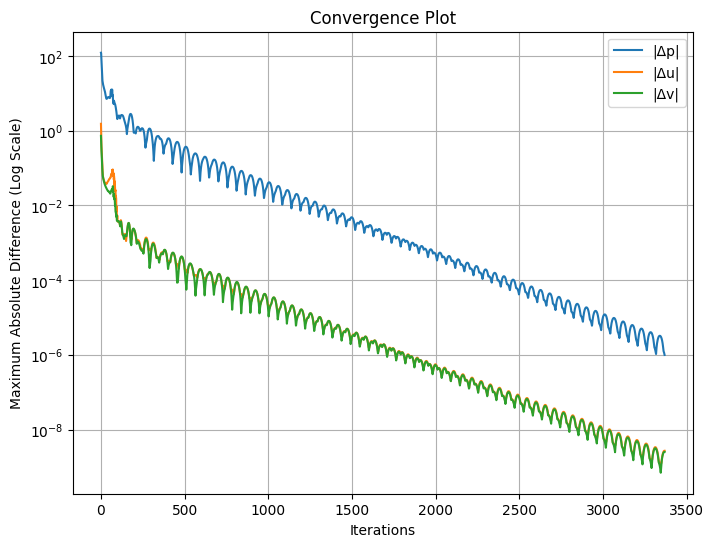

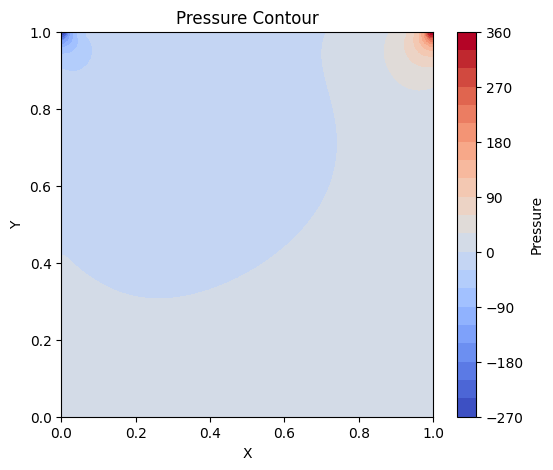

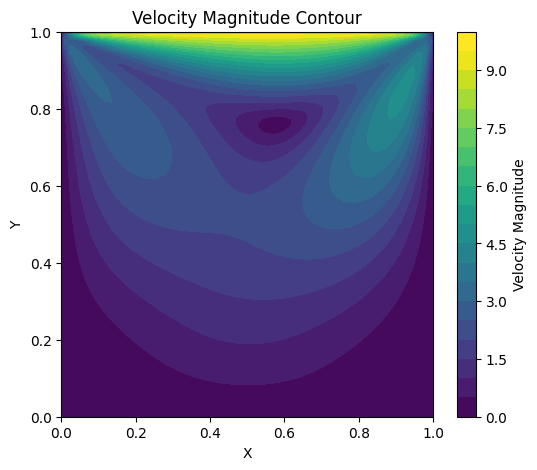

In [ ]:
### PLOTS ###
# Plot max differences vs iterations
plt.figure(figsize=(8, 6))
plt.semilogy(range(len(p_diffs)), p_diffs, label="|Δp|")
plt.semilogy(range(len(u_diffs)), u_diffs, label="|Δu|")
plt.semilogy(range(len(v_diffs)), v_diffs, label="|Δv|")
plt.xlabel("Iterations")
plt.ylabel("Maximum Absolute Difference (Log Scale)")
plt.legend()
plt.grid()
plt.title("Convergence Plot")
plt.show()
print('\n')


# PRESSURE CONTOUR
plt.figure(figsize = (6, 5))
p_contour = plt.contourf(X_p, Y_p, p.T, cmap = "coolwarm", levels = 20)
plt.colorbar(p_contour, label = "Pressure")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pressure Contour")

# Set the limits of the axes to match the x and y values from dx to L + dx and dy to total_H + dy
plt.xlim([dx, L + dx])
plt.ylim([dy, total_H + dy])

# Set the ticks to show from 0 to L and 0 to total_H
plt.xticks(ticks = np.linspace(dx, L + dx, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, L, num = 6)])
plt.yticks(ticks = np.linspace(dy, total_H + dy, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, total_H, num = 6)])

# Adjust colorbar to show the minimum and maximum values visible in the plot
p_contour.set_clim(vmin = p[1:-1, 1:-1].min(), vmax = p[1:-1, 1:-1].max())
plt.show()
print('\n')


# VELOCITY MAGNITUDE CONTOUR (INTERPOLATED)
U_interp = np.zeros_like(u_vel)
V_interp = np.zeros_like(v_vel)

U_interp[1:-1, 1:-1] = (u_vel[1:-1, 1:-1] + u_vel[2:, 1:-1]) / 2
V_interp[1:-1, 1:-1] = (v_vel[1:-1, 1:-1] + v_vel[1:-1, 2:]) / 2
Velocity_Magnitude = np.sqrt(U_interp**2 + V_interp**2)

plt.figure(figsize = (6, 5))
velMag_contour = plt.contourf(X_p, Y_p, Velocity_Magnitude.T, cmap = "viridis", levels = 20)
plt.colorbar(velMag_contour, label = "Velocity Magnitude")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Velocity Magnitude Contour")

# Set the limits of the axes to match the x and y values from dx to L + dx and dy to total_H + dy
plt.xlim([dx, L + dx])
plt.ylim([dy, total_H + dy])

# Set the ticks to show from 0 to L and 0 to total_H
plt.xticks(ticks = np.linspace(dx, L + dx, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, L, num = 6)])
plt.yticks(ticks = np.linspace(dy, total_H + dy, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, total_H, num = 6)])

# Adjust colorbar to show the minimum and maximum values visible in the plot
velMag_contour.set_clim(vmin = Velocity_Magnitude.min(), vmax = Velocity_Magnitude.max())
plt.show()
print('\n')


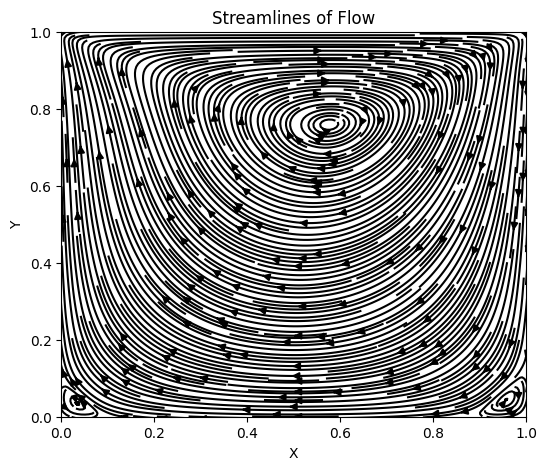

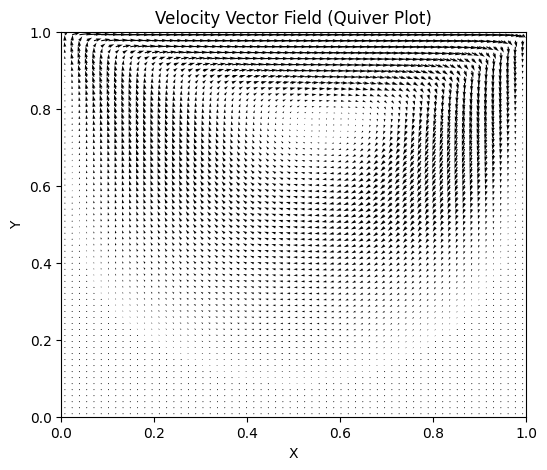

In [ ]:
# STREAMLINES OF FLOW
plt.figure(figsize=(6, 5))
plt.streamplot(X_p, Y_p, U_interp.T, V_interp.T, density = 4, color = "k")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Streamlines of Flow")

# Set the limits of the axes to match the x and y values from dx to L + dx and dy to total_H + dy
plt.xlim([dx, L + dx])
plt.ylim([dy, total_H + dy])

# Set the ticks to show from 0 to L and 0 to total_H
plt.xticks(ticks = np.linspace(dx, L + dx, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, L, num = 6)])
plt.yticks(ticks = np.linspace(dy, total_H + dy, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, total_H, num = 6)])
plt.show()
print('\n')


# QUIVER PLOT (VELOCITY VECTORS)
plt.figure(figsize=(6, 5))
plt.quiver(X_p, Y_p, U_interp.T, V_interp.T)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Velocity Vector Field (Quiver Plot)")

# Set the limits of the axes to match the x and y values from dx to L + dx and dy to total_H + dy
plt.xlim([dx, L + dx])
plt.ylim([dy, total_H + dy])

# Set the ticks to show from 0 to L and 0 to total_H
plt.xticks(ticks = np.linspace(dx, L + dx, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, L, num = 6)])
plt.yticks(ticks = np.linspace(dy, total_H + dy, num = 6), labels = [f"{tick:.1f}" for tick in np.linspace(0, total_H, num = 6)])
plt.show()
print()
